## k-Nearest Neighbors

The kNN algorithm is a supervised machine learning model. That means it predicts a target variable using one or multiple independent variables. 

kNN Is a Supervised Learner for Both Classification and Regression

Supervised machine learning algorithms can be split into two groups based on the type of target variable that they can predict:

Classification is a prediction task with a categorical target variable. Classification models learn how to classify any new observation. This assigned class can be either right or wrong, not in between. A classic example of classification is the iris dataset, in which you use physical measurements of plants to predict their species. A famous algorithm that can be used for classification is logistic regression.

Regression is a prediction task in which the target variable is numeric. A famous example of regression is the Housing Prices Challenge on Kaggle. In this machine learning contest, participants try to predict the sales prices of houses based on numerous independent variables.

## kNN Is Fast and Interpretable

As a final criterion to characterize machine learning models, you need to take into account model complexity. Machine learning, and especially artificial intelligence, is currently blooming and is being used in many complicated tasks, such as understanding text, images, and speech, or for self-driving cars.

More advanced and complex models like neural networks can probably learn anything that a k-Nearest Neighbors model can. After all, those advanced models are very strong learners. However, be aware that this complexity also has its price. In order to make the models fit to your prediction, you’ll generally spend much more time on development.

You’ll also need much more data to fit a more complex model, and data is not always available. Last but not least, more complex models are more difficult for us humans to interpret, and sometimes this interpretation can be very valuable.

This is where the force of the kNN model lies. It allows its users to understand and interpret what’s happening inside the model, and it’s very fast to develop. This makes kNN a great model for many machine learning use cases that don’t require highly complex techniques.

## Drawbacks of KNN

It’s only fair to also be honest about the drawbacks of the kNN algorithm. As touched upon before, the real drawback of kNN is its capacity to adapt to highly complex relationships between independent and dependent variables. kNN is less likely to perform well on advanced tasks like computer vision and natural language processing.

You can try to push the performance of kNN as far as possible, potentially by adding other techniques from machine learning. At a certain point of complexity, though, kNN will probably be less effective than other models regardless of the way it was tuned.

### Use kNN to predict the age of sea slugs

Problem statement: The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.
The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.
You’ll be applying a kNN to find the closest prediction score possible.

In [2]:
import pandas as pd
url = (
"https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [4]:
abalone.columns = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Rings',
]

In [5]:
abalone = abalone.drop('Sex', axis=1)

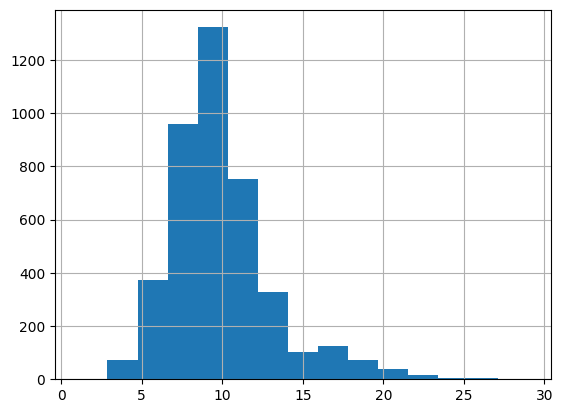

In [6]:
#Descriptive Stats from the abalone dataset
import matplotlib.pyplot as plt
abalone['Rings'].hist(bins=15)
plt.show()

In [7]:
correlation_matrix = abalone.corr()
correlation_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

### Define 'Nearest' Using a Mathematical Definition of Distance

<img src="https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/knn_pytagoras.78c35cf28a3d.png&w=1512&sig=5f87874a6658133f02d9a53fd5782363d1bb6dec">

In this picture, you see two data points: blue at (2,2) and green at (4,4). To compute the distance between them, you can start by adding two vectors. Vector a goes from point (4,2) to point (4,4), and vector b goes from point (4,2) to point (2,2). Their heads are indicated by the colored points. Note that they are at a 90 degree angle.

The difference between these vectors is the vector c, which goes from the head of vector a to the head of vector b. The length of vector c represents the distance between your two data points.

The length of a vector is called the norm. The norm is a positive value that indicates the magnitude of the vector. You can compute the norm of a vector using the Euclidean formula:
Euclidean Distance

In [8]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a-b)

2.8284271247461903

In [10]:
#Find K-Nearest Neighors
X = abalone.drop('Rings', axis=1)
X = X.values
y = abalone['Rings']
y = y.values

In [12]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208
])

distances = np.linalg.norm(X - new_data_point, axis=1)

In [13]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

## Voting or Averaging of Multiple Neighbors

In [ ]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

## Average for Regression

In [ ]:
prediction = nearest_neighbor_rings.mean()

## Model for Classification

In [ ]:
import scipy.stats
class_neighbors = np.array(['A', 'B', 'B', 'C'])
scipy.stats.mode(class_neighbors)

# Fit kNN in Pythong Using scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 12345
)

#Test size = 0.2 meanst hat 80 percent will be training data

from sklearn.neighgbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

#Inspect model fit
from sklearn.metrics import mean_squared error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
mse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrtr(mse)
rmse

In [ ]:
# Plotting the Fit of your model
import seaborn as sns
cmap = sns.chubelix_palette(as_cmap=True)
f, ax  = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

## Tune and Optimize kNN in Python using sci-kit learn

There are numerous ways you can improve your predictive score. Some improvements could be made by working on the input data using data wrangling, but in this tutorial, the focus is on the kNN algorithm. Next, you’ll look at ways to improve the algorithm part of the modeling pipeline.
Improving kNN Performances in scikit-learn Using GridSearchCV

Until now, you’ve always worked with k=3 in the kNN algorithm, but the best value for k is something that you need to find empirically for each dataset.

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.

If you have multiple data points, the impact of one extremely different neighbor will be much less.

If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called <b><u>GridSearchCV</u></b>. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

GridSearchCV is available in scikit-learn, and it has the benefit of being used in almost the exact same way as the scikit-learn models:

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

Here, you use GridSearchCV to fit the model. In short, GridSearchCV repeatedly fits kNN regressors on a part of the data and tests the performances on the remaining part of the data. Doing this repeatedly will yield a reliable estimate of the predictive performance of each of the values for k. In this example, you test the values from 1 to 50.

In the end, it will retain the best performing value of k, which you can access with .best_params_:

In [ ]:
gridsearch.best_params_

In this code, you print the parameters that have the lowest error score. With .best_params_, you can see that choosing 25 as value for k will yield the best predictive performance. Now that you know what the best value of k is, you can see how it affects your train and test performances:

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

## Adding Weight Average of Neighbors based on Distance

Using GridSearchCV, you reduced the test RMSE from 2.37 to 2.17. In this section, you’ll see how to improve the performances even more.

Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging you should use:

In [ ]:
parameters = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance']
    
}
gridsearch = GrfidSearchCV(KNeighborsregressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse)

Here, you test whether it makes sense to use a different weighing using your GridSearchCV. Applying a weighted average rather than a regular average has reduced the prediction error from 2.17 to 2.1634. Although this isn’t a huge improvement, it’s still better, which makes it worth it.

## Further Improving on kNN in scikit-learn with bagging

As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging often uses decision trees, but kNN works perfectly as well.

Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a hundred models should be wrong less often. The errors of different individual models are likely to average each other out, and the resulting prediction will be less variable.

You can use scikit-learn to apply bagging to your kNN regression using the following steps. First, create the KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV:

In [ ]:
best_k = gridsearch.best_params_['n_neighbors']
best_weights = gridsearch.best_params_['weights']
bagged_knn = KNeighborsRegress(
    n_neighbors = best_k, weights = best_weights
)

#Then import the BaggingRegressor class rom scikit-learn and create a new instance with 100 estimators using the bagged_knn model:

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators = 100)

#Now you can make a prediction and calculate the RMSE to see if it improved
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

## Comparison of the Four Models

Model/Error
- Arbitrary k = 2.37
- GridSearchCV for k = 2.17
- GridSearchcv for k and weights = 2.1634
- Bagging and GridSearchCV = 2.1616

<src img='https://files.realpython.com/media/first_scatter.dd9e9b8454b9.png'>